<a href="https://colab.research.google.com/github/120090016/SLPcourse/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

The goal of assignment 3 is for your learn TD-IDF, cosine similarity, and embedding. 

Here are four types of data (i.e. four categories of lyrics)
* https://slpcourse.github.io/materials/lyrics/country.txt
* https://slpcourse.github.io/materials/lyrics/pop.txt
* https://slpcourse.github.io/materials/lyrics/rap.txt
* https://slpcourse.github.io/materials/lyrics/rock.txt

Each song is segmented by `<SONG_BOUNDARY>`

## Task 1: TF-IDF [25 marks]

Implement the TF-IDF algorithm. You need to write your own compute_tf, and compute_idf functions.

In [4]:
# impement your TF-IDF algorithms here
import requests
import re
import numpy as np

#derive the lyrics form the given urls and save lyrics of a song as an element 
url1 = "https://slpcourse.github.io/materials/lyrics/country.txt"
url2 = "https://slpcourse.github.io/materials/lyrics/pop.txt"
url3 = "https://slpcourse.github.io/materials/lyrics/rap.txt"
url4 = "https://slpcourse.github.io/materials/lyrics/rock.txt"

# save each song lyric as an element in the list 
lyric_list = []
for i in [url1,url2,url3,url4] :
  r = requests.get(i)
  file = r.content
  file = file.decode('utf-8')
  # eliminate the redundant backspace 
  newlspace = re.compile(r'\n')
  file = newlspace.sub(' ',file)
  lyric_list += file.split("<SONG_BOUNDARY>")

# save every word that appears in the lyrics in the list
word_list = []
for i in range(len(lyric_list)) :
  for word in lyric_list[i].split(" ") :
    if not (word in word_list) :
      word_list.append(word) 

In [5]:
# the function to calculate the tf
def compute_tf(word,lyric) :
  number = 0
  if word in lyric.split(" "):
    number += 1
  return np.log10(number + 1)

# the function to calculate the idf
def compute_idf(word) :
  number = 0
  for lyric in lyric_list : 
    if word in lyric:
      number += 1
      continue
  return np.log10(len(lyric_list)/(number))

## Task 2: Kmeans clustering [45 marks]

Perform kmeans clustering with the TF-IDF weights. You need to initialize the kmeans centroid in two different ways: random initialization, and smart initialization where you initialize the centroid with a vector from each category.

Here are your tasks

*   Visualize the clustering results from random initialization. each cluster need to have its own color, and highlight the centroid
*   Visualize the clustering results from smart initialization. each cluster need to have its own color, and highlight the centroid
*   Calculate the cosine similarity of the kmeans centroid from smart initialization. Present your result in a table
*   Discuss the difference and your observation

You may use scikit-learn for kmeans clustering and t-SNE visualization



In [6]:
# implement task 2 here
# computue the tf_idf for each song lyric and save them into the list
lyric_vector = []
for lyric in lyric_list :
  vec = []
  for word in word_list :
    tf_idf = compute_idf(word)*compute_tf(word,lyric)
    vec.append(tf_idf)
  lyric_vector.append(vec)



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


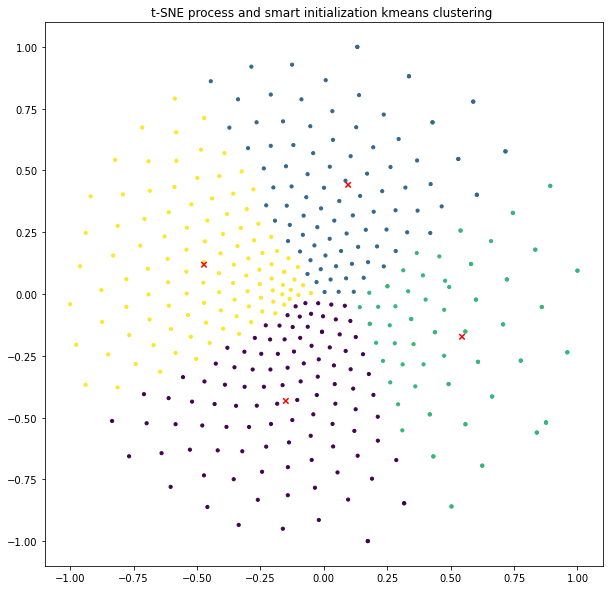

In [19]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# do t-SNE dimension reduction first. Change the vectors into two dimension
tsne = TSNE(n_components=2)
result = tsne.fit_transform(np.array(lyric_vector))

# do normalization to make these vector values range from (-1,1)
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
result2 = scaler.fit_transform(result)

# do Kmeans cluster with n=4 ,and it results from smart initialization
cluster = KMeans(n_clusters=4)
cluster_smart = cluster.fit(result2) 

# derive the clusters and centers of these vectors
pred = cluster_smart.labels_
center_smart = cluster_smart.cluster_centers_


# set the color for the center
color = ['red', 'red', 'red', 'red']

# visualize the result
plt.figure(figsize=(10, 10))
plt.title('t-SNE process and smart initialization kmeans clustering ')

plt.scatter(result2[:,0], result2[:,1], c=pred, s=10)
plt.scatter(center_smart[:,0], center_smart[:,1], c=color, s=30, marker='x')


In [16]:
print(pred[1:100])

[2 0 2 1 2 3 1 1 3 1 3 3 1 3 0 1 1 0 2 3 1 2 1 1 3 3 1 1 0 3 3 1 0 0 3 0 3
 3 3 1 3 3 3 0 3 3 0 2 3 3 3 3 0 3 3 3 3 1 0 2 0 2 0 1 3 2 3 0 2 3 2 1 3 0
 3 0 3 2 3 0 3 0 1 2 0 0 0 1 0 3 2 3 3 1 3 0 0 3 1]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


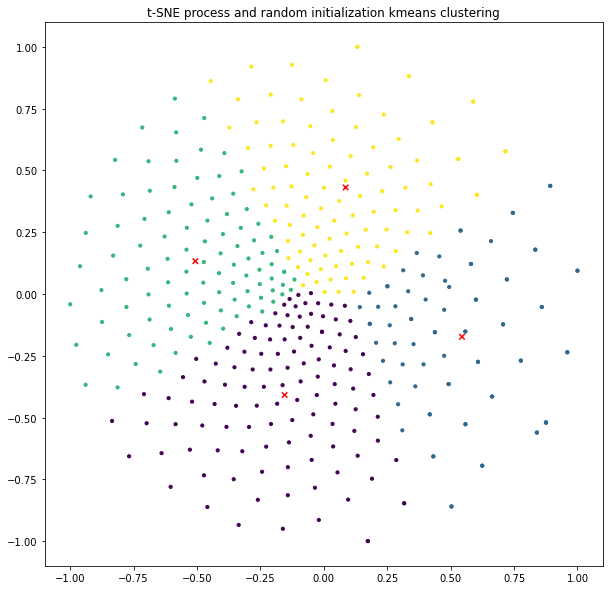

In [20]:

# do Kmeans cluster with n=4 ,and it results from random initialization
cluster = KMeans(n_clusters=4,init = "random")
cluster_random = cluster.fit(result2) 

# derive the clusters and centers of these vectors
pred = cluster_random.labels_
center_random = cluster_random.cluster_centers_

# set the color for the center
color = ['red', 'red', 'red', 'red']

# visualize the result
plt.figure(figsize=(10, 10))
plt.title('t-SNE process and random initialization kmeans clustering')

plt.scatter(result2[:,0], result2[:,1], c=pred, s=10)
plt.scatter(center_random[:,0], center_random[:,1], c=color, s=30, marker='x')

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
#calculate the cosine similarity table for the four centers
cosine = cosine_similarity(center_smart)    
print(cosine)

[[ 1.         -0.98487306 -0.20861603  0.16702609]
 [-0.98487306  0.99999994  0.03599564  0.00634357]
 [-0.20861603  0.03599564  0.9999999  -0.9991035 ]
 [ 0.16702609  0.00634357 -0.9991035   1.        ]]


Discussion and findings: 

By observing two graphs shown above, we find that although we choose different initialization, the result is similar. The reason may due to these points' uniformly distribution. 

When we observe the center of these four clusters (the red "X"), we find that they are perpendicular to each other. This makes sence when we see the cosine similarity table. one of them has -1 value and two of them have 0 values. They are perpendicular to each other.

There is another finding. When we check the first 100 lyrics' cluster, we find they belongs to different clusters. We guess this may caused by t-SNE. After the dimension reduction, we change a more than twenty thousant dimension veactor into a two dimension vector. Then we do the k-means clustering. This process lost too much information.


##Task 3: Kmeans clustering with Word2vec or BERT embedding [30 marks]

Similar to task 2, but perform kmeans clustering with word2vec or BERT embedding.
Here are your tasks

*   Visualize the clustering results from random initialization. each cluster need to have its own color, and highlight the centroid
*   Visualize the clustering results from smart initialization. each cluster need to have its own color, and highlight the centroid
*   Discuss the difference and your observation

You may use scikit-learn for kmeans clustering and t-SNE visualization



In [49]:
# implement task 3 here
from gensim.models import Word2Vec
import nltk

# split each lyric by space and save them in the list
corpus = []
for sentence in lyric_list:
    corpus.append(sentence.split(" ")) 


# use the Word2Vec model, and we set the vector size as 150, window size is 5
model = Word2Vec(corpus,size = 150, min_count=5,sg=1,window=5)


# save the result in the word2vec.txt
model.wv.save_word2vec_format('word2vec.txt',binary=False) 

# construct the lyric vector for each song
# the sum of all the word vectors (derived from the Word2Vec model) multipling with their word frequency 
#  is used as the lyric vector for each song

lyric_vec = []
for sen in corpus :
  vec = 0
  for word in sen :
    if word in model.wv.vocab.keys():
      vec += (model.wv[word]/len(sen))
  lyric_vec.append(vec)


In [50]:
from sklearn import preprocessing
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# do t-SNE dimension reduction first. Change the vectors into two dimension
tsne = TSNE(n_components=2)
result = tsne.fit_transform(np.array(lyric_vec))

# do normalization to make these vector values range from (-1,1)
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
result2 = scaler.fit_transform(result)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


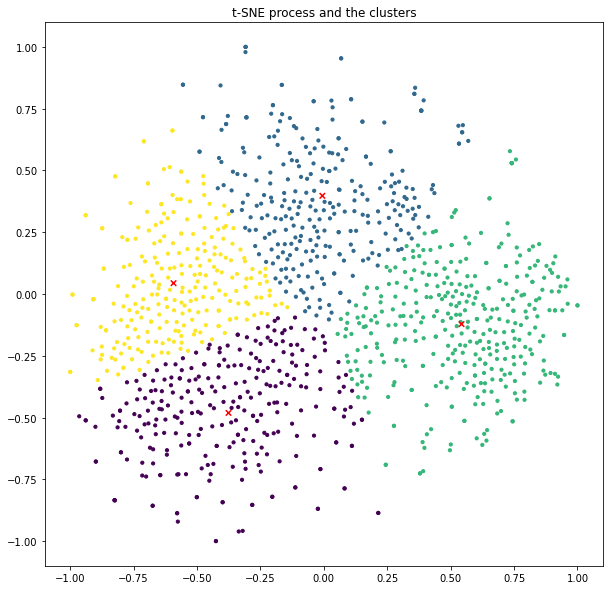

In [57]:
# do Kmeans cluster with n=4 ,and it results from smart initialization
cluster = KMeans(n_clusters=4)
cluster_smart = cluster.fit(result2) 

# derive the clusters and centers of these vectors
pred = cluster_smart.labels_
center_smart = cluster_smart.cluster_centers_

# set the color for the center
color = ['red', 'red', 'red', 'red']

# visualize the result
plt.figure(figsize=(10, 10))
plt.title('t-SNE process and smart initialization kmeans clustering')
plt.scatter(result2[:,0], result2[:,1], c=pred, s=10)
plt.scatter(center_smart[:,0], center_smart[:,1], c=color, s=30, marker='x')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


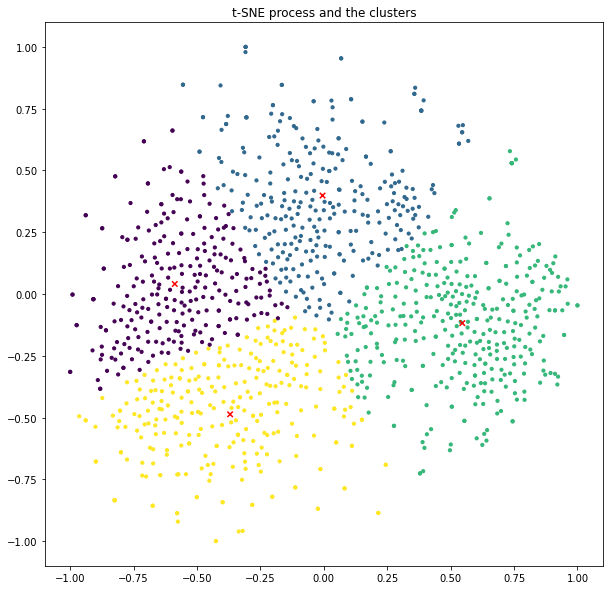

In [55]:
# do Kmeans cluster with n=4 ,and it results from random initialization
cluster = KMeans(n_clusters=4,init = "random")
cluster_random = cluster.fit(result2) 

# derive the clusters and centers of these vectors
pred = cluster_random.labels_
center_random = cluster_random.cluster_centers_

# set the color for the center
color = ['red', 'red', 'red', 'red']

# visualize the result
plt.figure(figsize=(10, 10))
plt.title('t-SNE process and random initialization kmeans clustering')
plt.scatter(result2[:,0], result2[:,1], c=pred, s=10)
plt.scatter(center_random[:,0], center_random[:,1], c=color, s=30, marker='x')

Discussion and findings:

In this task, we implement lyric clustering by Word2Vec embedding. First,we use Word2Vec to construct a 150 dimension vector for each word. In order to represent the vector of a song, we use the sum of all words' frequency multiple with their vectors. After we get the vector for each lyric, we do similar dimension reduction similar to task two.

When we observe these two graph, we find that they are also almost the same, which shows the initialization we choose does not influence the clustering.
When it comes to the center of these four clusters, we find that they are almost perpendicular to each other. 

We compare the result between task2 and task3. The most important imformation is that the center of these clusters are perpendicular to each other both in task 2 and 3, which shows these four types of lyrics are notsimilar. However The result in task2 distributes more uniformly than task3, this may show that tf-idf used in task 2 has less sensitivity than Word2Vec. we are able to get more imformation by using Word2Vec embedding.
